## McDonald's Market Segmentation

**Overview**

**Market Segmentation Definition:**
The process of dividing a broad consumer or business market into sub-groups of consumers based on shared characteristics, needs, or behaviors.

**Importance for McDonald's:**
By understanding its customer base through segmentation, McDonald's can tailor its products, marketing strategies, and overall experience to different groups.
Key Segmentation Strategies
Demographic Segmentation:

McDonald's targets various demographic groups, including families, children, young adults, and health-conscious consumers.
They adjust their menu items (like Happy Meals for kids and healthier options for adults) to appeal to these different demographics.

**Outcomes and Insights**

The segmentation strategy has led to increased customer satisfaction and loyalty.
By continuously analyzing market trends and customer feedback, McDonald's can adapt and refine its strategies, maintaining its competitive edge in the fast-food industry.

**Conclusion**

The McDonald's case study illustrates the importance of market segmentation in developing effective marketing strategies. By understanding and addressing the unique needs of different customer segments, McDonald's can enhance its brand appeal, improve customer experiences, and drive sales growth.

**References:**

*  GitHub Repository: https://github.com/Crisovet/MS_studytask
*  Market Segmentation Analysis: Understanding It, Doing It, and Making It Useful - Grün, Bettina, Friedrich Leisch, and Sara Dolnicar.
*  ChatGPT



In [2]:
pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59220 sha256=e342bb95564fc7a9725a468e8ab150bde85bf497189f9dd09af2033f218ffc71
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


In [60]:
# Importing necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score


In [61]:
# Reading the data
data = pd.read_csv(r'mcdonalds.csv')
print("The columns in this dataset:")
cols = data.columns
for i in cols:
    print(i)
data1=pd.read_csv(r"mcdonalds.csv")

The columns in this dataset:
yummy
convenient
spicy
fattening
greasy
fast
cheap
tasty
expensive
healthy
disgusting
Like
Age
VisitFrequency
Gender


In [35]:
data.shape

(1453, 15)

In [36]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


Each attribute reflects a YES or NO response, indicating whether the respondent possesses the specific attribute. In addition to these columns, the respondents have also provided their AGE and GENDER information.

In [39]:
# Creating segmentation variables. Select the first 11 columns from the dataset and replace "Yes" with 1, and "No" with 0
MD = data.iloc[:, 0:11].replace("Yes", 1).replace("No", 0)

# Calculate the mean for each of these columns and round the result to 2 decimal places
mean = round(MD.mean(), 2)

# Multiply the mean values by 100 to convert them to percentages
mean * 100

<ipython-input-39-fe8d54916b34>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MD = data.iloc[:, 0:11].replace("Yes", 1).replace("No", 0)


,0
yummy,55.0
convenient,91.0
spicy,9.0
fattening,87.0
greasy,53.0
fast,90.0
cheap,60.0
tasty,64.0
expensive,36.0
healthy,20.0


In [38]:
MD.describe().T

,count,mean,std,min,25%,50%,75%,max
yummy,1453.0,0.552650,0.497391,0.0,0.0,1.0,1.0,1.0
convenient,1453.0,0.907777,0.289440,0.0,1.0,1.0,1.0,1.0
spicy,1453.0,0.093599,0.291371,0.0,0.0,0.0,0.0,1.0
fattening,1453.0,0.867171,0.339506,0.0,1.0,1.0,1.0,1.0
greasy,1453.0,0.526497,0.499469,0.0,0.0,1.0,1.0,1.0
fast,1453.0,0.900206,0.299828,0.0,1.0,1.0,1.0,1.0
cheap,1453.0,0.598761,0.490318,0.0,0.0,1.0,1.0,1.0
tasty,1453.0,0.644184,0.478925,0.0,0.0,1.0,1.0,1.0
expensive,1453.0,0.357880,0.479542,0.0,0.0,0.0,1.0,1.0
healthy,1453.0,0.198899,0.399309,0.0,0.0,0.0,0.0,1.0


In [40]:
# Initialize PCA (Principal Component Analysis) model
pca = PCA()

# Fit PCA to the data 'MD' and transform the data to obtain principal components
MD_pca = pca.fit_transform(MD)

# Fit PCA to the 'MD' data (this calculates the principal components but does not transform the data)
MD_p = pca.fit(MD)

# Calculate the standard deviation (square root of the explained variance for each principal component)
SD = np.sqrt(pca.explained_variance_)

# Extract the proportion of variance explained by each principal component
PV = pca.explained_variance_ratio_

# Create an empty list to store the principal component labels (e.g., "PC1", "PC2", ...)
index = []
for i in range(len(SD)):  # Loop over the number of components (same as the length of SD)
    i = i + 1  # Increment 'i' by 1 to match component numbering (starting from 1)
    index.append("PC{}".format(i))  # Add "PC1", "PC2", etc., to the index list

# Create a DataFrame that summarizes the standard deviation, proportion of variance, and cumulative proportion
sum = pd.DataFrame({
    "Standard deviation": SD,  # Add the calculated standard deviation values
    "Proportion of Variance": PV,  # Add the proportion of variance for each component
    "Cumulative Proportion": PV.cumsum()  # Add the cumulative sum of the variance proportions
}, index=index)  # Use the 'index' list created earlier as the row labels (PC1, PC2, etc.)

sum


,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [42]:
# Print the standard deviation for each principal component, rounded to 1 decimal place
print("Standard Deviation:\n", SD.round(1))

# Retrieve the loadings (coefficients) of the principal components
load = (pca.components_)

# Transpose the component matrix to get the rotated matrix, where features are rows and components are columns
rot_matrix = MD_p.components_.T

# Create a DataFrame from the rotated matrix, using the feature names as row labels and PC labels as column names
rot_df = pd.DataFrame(rot_matrix, index=MD.columns.values, columns=index)

# Round the values in the DataFrame to 3 decimal places and negate them (flipping sign)
rot_df = round(-rot_df, 3)



Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [43]:
rot_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.477,0.364,-0.304,-0.055,-0.308,0.171,0.281,0.013,0.572,-0.110,0.045
convenient,-0.155,0.016,-0.063,0.142,0.278,-0.348,0.060,-0.113,-0.018,-0.666,-0.542
spicy,-0.006,0.019,-0.037,-0.198,0.071,-0.355,-0.708,0.376,0.400,-0.076,0.142
fattening,0.116,-0.034,-0.322,0.354,-0.073,-0.407,0.386,0.590,-0.161,-0.005,0.251
greasy,0.304,-0.064,-0.802,-0.254,0.361,0.209,-0.036,-0.138,-0.003,0.009,0.002
fast,-0.108,-0.087,-0.065,0.097,0.108,-0.595,0.087,-0.628,0.166,0.240,0.339
cheap,-0.337,-0.611,-0.149,-0.119,-0.129,-0.103,0.040,0.140,0.076,0.428,-0.489
tasty,-0.472,0.307,-0.287,0.003,-0.211,-0.077,-0.360,-0.073,-0.639,0.079,0.020
expensive,0.329,0.601,0.024,-0.068,-0.003,-0.261,0.068,0.030,0.067,0.454,-0.490
healthy,-0.214,0.077,0.192,-0.763,0.288,-0.178,0.350,0.176,-0.186,-0.038,0.158


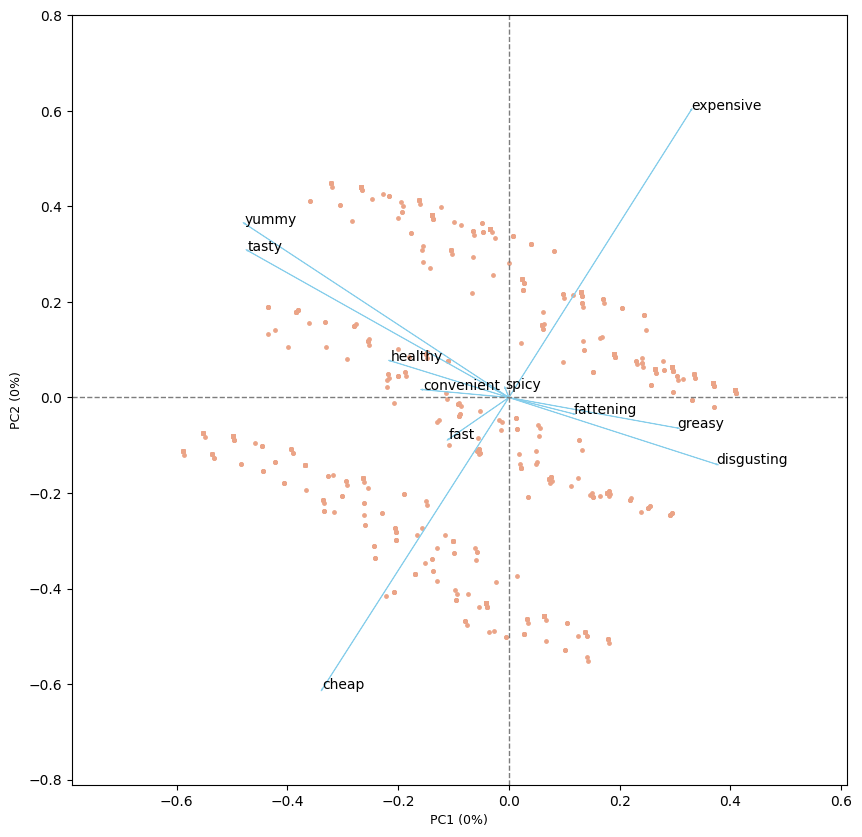

In [45]:
# The biplot visualizes the principal component analysis results.
# The data points (observations) are plotted based on their principal component scores.
# The vectors (loadings) indicate how much each original variable contributes to the principal components.
cluster.biplot(
    cscore=MD_pca,          # The PCA-transformed data, representing each observation in the new space defined by principal components
    loadings=-load,          # The loadings matrix, representing how strongly each variable influences the principal components
    labels=data.columns.values,  # Labels for the biplot, corresponding to the original variables
    var1=0,                 # Variance explained by PC1 (set to 0, but typically this should be pcexpratio[0]*100)
    var2=0,                 # Variance explained by PC2 (set to 0, but typically this should be pcexpratio[1]*100)
    show=True,              # Show the plot immediately after creation
    dim=(10, 10)            # Dimension of the plot, setting it to a 10x10 square plot
)

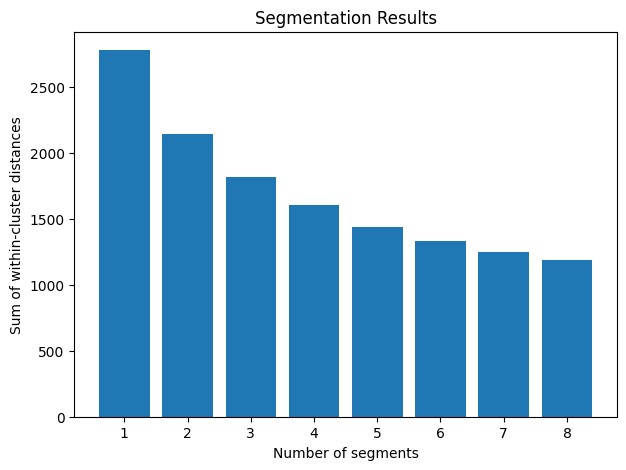

In [47]:
np.random.seed(1234)

# Number of times the KMeans algorithm will be run with different centroid seeds
nrep = 10

# Define a range of cluster numbers to evaluate
num_segments = range(1, 9)

# Initialize list to store the sum of within-cluster distances (inertia) for each cluster count
within_cluster_distances = []

# Initialize dictionary to store KMeans models for each cluster count
MD_km28 = {}

# Loop over different values of 'k' (number of clusters) and run KMeans
for k in num_segments:
    # Run KMeans with the current number of clusters 'k' and 'nrep' initializations
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)

    # Fit the KMeans model on the dataset MD
    kmeans.fit(MD)

    # Store the sum of within-cluster distances (inertia) for the current number of clusters
    within_cluster_distances.append((kmeans.inertia_))

    # Save the KMeans model in a dictionary, with the key being the number of clusters
    MD_km28[str(k)] = kmeans

# Plot the sum of within-cluster distances (inertia) against the number of clusters
plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()


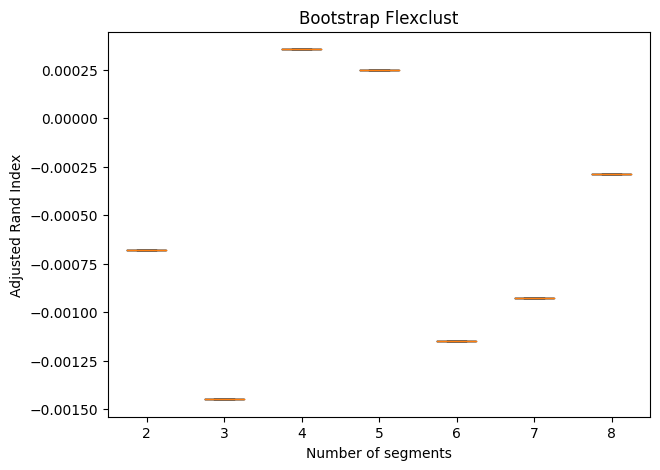

In [50]:
np.random.seed(1234)

# Define number of bootstrap samples and KMeans repetitions
nboot = 100  # Number of bootstrap samples
nrep = 10    # Number of initializations for KMeans

# Initialize a list to hold bootstrap samples
bootstrap_samples = []
# Create bootstrap samples
for _ in range(nboot):
    # Resample the dataset with replacement to create a bootstrap sample
    bootstrap_sample = resample(MD.values, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)  # Append sample to the list

# Initialize a list to hold adjusted Rand Index scores for each number of segments
adjusted_rand_index = []

# Define the range for the number of segments to test
num_segments = range(2, 9)
# Loop over different numbers of clusters
for k in num_segments:
    # Initialize a list to hold stability scores for each bootstrap sample
    stability_scores = []
    # Loop over each bootstrap sample
    for bootstrap_sample in bootstrap_samples:
        # Create KMeans object with current number of clusters
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)

        # Fit the KMeans model to the bootstrap sample
        kmeans.fit(bootstrap_sample)

        # Predict cluster labels for the bootstrap sample
        cluster_labels = kmeans.predict(bootstrap_sample)

        # Predict cluster labels for the original dataset MD
        true_labels = kmeans.predict(MD.values)

        # Calculate adjusted Rand index between true labels and bootstrap cluster labels
        stability_score = adjusted_rand_score(true_labels, cluster_labels)

        # Append the stability score to the list
        stability_scores.append(stability_score)

    # Append stability scores for the current number of segments to the adjusted Rand index list
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list to have clusters as columns and bootstrap scores as rows
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create a boxplot of adjusted Rand index for each number of segments
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()


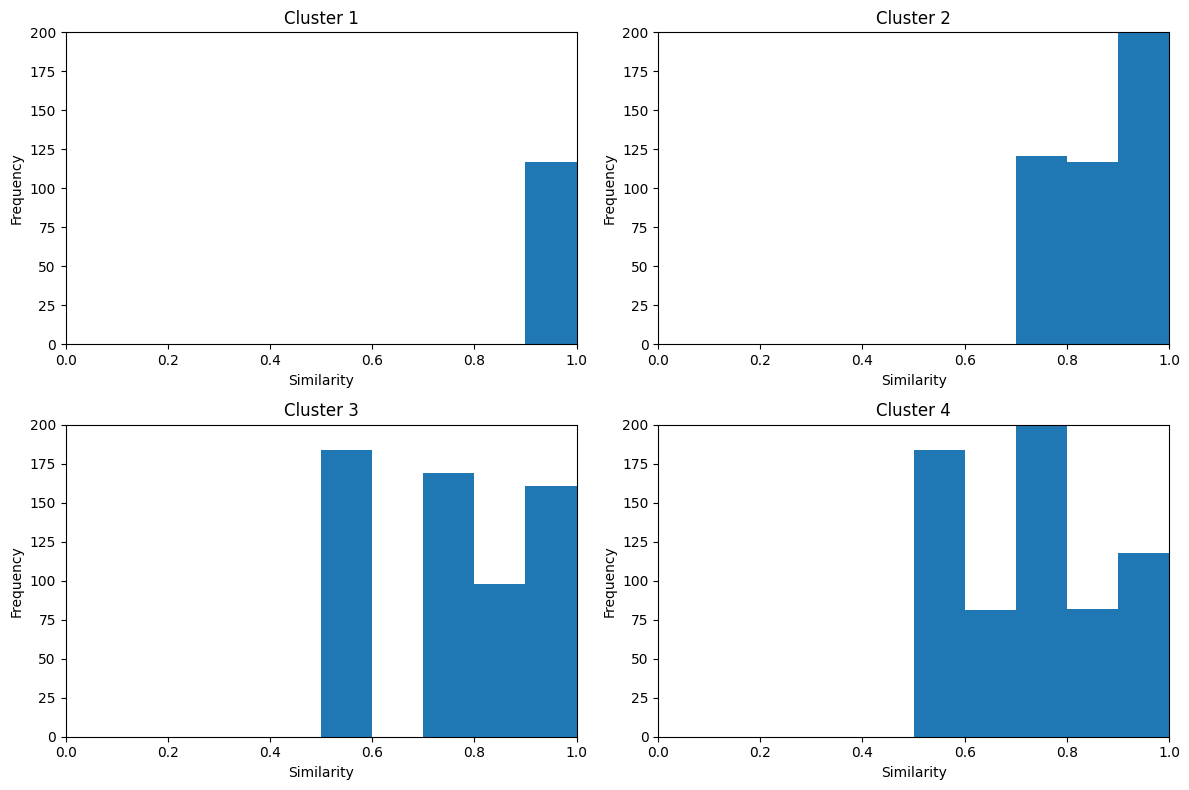

In [51]:
# Define the range for similarity values and parameters for the histogram
range_values = (0, 1)       # The range of similarity values to consider
num_bins = 10                # Number of bins to use in the histogram
max_frequency = 200          # Maximum frequency for y-axis limit

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Loop through clusters 1 to 4
for i in range(1, 5):
    # Predict the cluster labels for the original dataset MD
    labels = MD_km28[str(i)].predict(MD)

    # Calculate the similarity (minimum distance) of each observation to its cluster center
    similarities = MD_km28[str(i)].transform(MD).min(axis=1)

    # Determine the row and column indices for the subplot
    row = (i - 1) // 2       # Integer division to find the row index (0 or 1)
    col = (i - 1) % 2        # Modulo operation to find the column index (0 or 1)

    # Create a histogram for the calculated similarities
    axs[row, col].hist(similarities, bins=num_bins, range=range_values)

    # Set the x and y labels for the subplot
    axs[row, col].set_xlabel('Similarity')      # X-axis label
    axs[row, col].set_ylabel('Frequency')       # Y-axis label

    # Set the title for the current subplot
    axs[row, col].set_title('Cluster {}'.format(i))  # Title indicating the cluster number

    # Set the limits for the x and y axes
    axs[row, col].set_xlim(range_values)           # X-axis limits
    axs[row, col].set_ylim(0, max_frequency)       # Y-axis limits

    # Define specific ticks for the x-axis
    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()


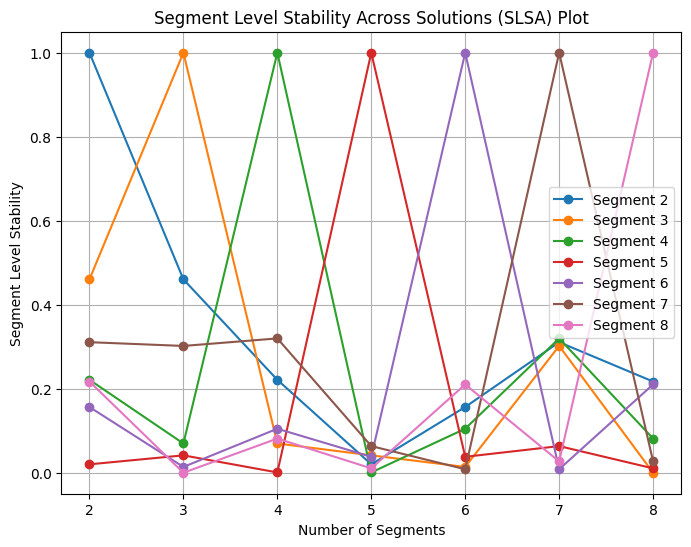

In [52]:
# Define the range of segments to analyze
num_segments = range(2, 9)

# Initialize a list to hold the predicted cluster labels for each segment
segment_stability = []

# Loop through each segment in the defined range
for segment in num_segments:
    # Predict the cluster labels for the current number of segments
    labels_segment = MD_km28[str(segment)].predict(MD)

    # Append the predicted labels for the segment to the stability list
    segment_stability.append(labels_segment)

# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Loop through each segment and calculate stability
for i, segment in enumerate(num_segments):
    # Calculate the proportion of agreement (stability) of the current segment with all previous segments
    stability_scores = [np.mean(segment_stability[i] == segment_stability[j]) for j in range(len(segment_stability))]

    # Plot the mean stability score against the number of segments
    plt.plot(num_segments, stability_scores, marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)
plt.show()


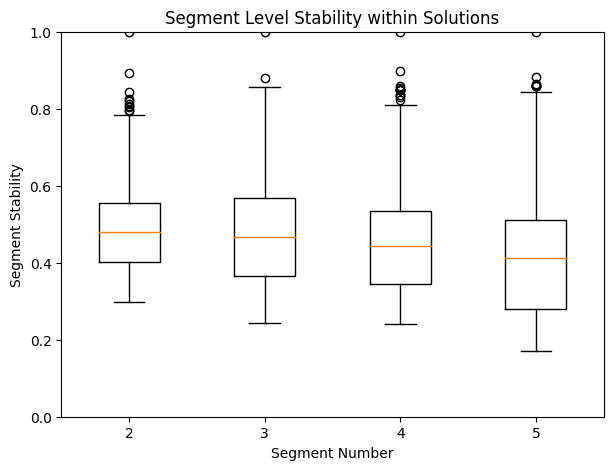

In [53]:
# Define the segment solutions to analyze
segment_solutions = ["2", "3", "4", "5"]

segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    # Predict the cluster labels for the current segment solution
    segment_labels[segment] = MD_km28[segment].predict(MD)

    # Calculate the minimum distances (similarities) for each observation to its cluster
    segment_similarities[segment] = MD_km28[segment].transform(MD).min(axis=1)

segment_stability_values = []

for segment in segment_solutions:
    similarities = segment_similarities[segment]

    # Normalize the similarities to range [0, 1]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()


In [54]:
# arious metrics for different values of k in a KMeans clustering model, such as the number of iterations until convergence, log-likelihood,
#Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), and Integrated Complete Likelihood (ICL). Each of these metrics helps
# in evaluating the clustering performance for the specified number of clusters.
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)


   iter  converged  k  k0       logLik          AIC          BIC          ICL
0    10       True  2   2 -2146.062044  4296.124088  4306.686859  4306.015908
1     5       True  3   3 -1896.330266  3798.660532  3814.504689  3813.529671
2     9       True  4   4 -1603.913802  3215.827604  3236.953147  3235.627738
3     9       True  5   5 -1502.697153  3015.394306  3041.801234  3040.267284
4     7       True  6   6 -1348.665399  2709.330799  2741.019113  2739.277954
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6     9       True  8   8 -1203.646165  2423.292330  2465.543415  2463.533662


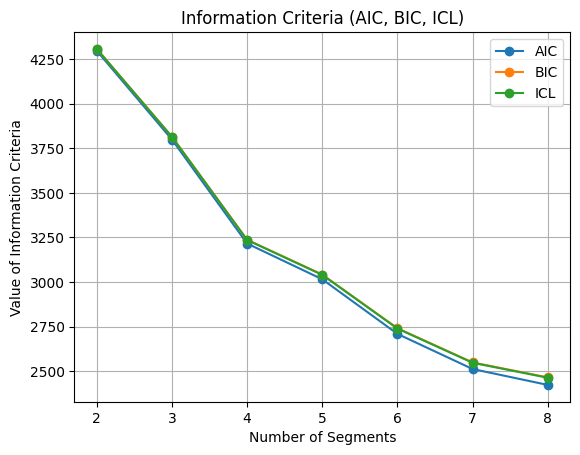

In [18]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()


In [55]:
# compares clustering results from KMeans and Gaussian Mixture Models (GMM) and further analyzes a specific cluster from the GMM results by applying KMeans
#clustering again to that subset.

from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD)
kmeans_clusters = kmeans.predict(MD)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD)
gmm_clusters = gmm.predict(MD)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))


mixture    0    1    2    3
kmeans                     
0        546    0    1   33
1          0  213   11    4
2         46    3  265    8
3         29   38    0  256
kmeans   0   1   2   3
kmeans                
0       51  15  35  20
1       18   8  11  11
2       23   9  14  22
3       29   5  15  15


In [56]:
# fit two separate Gaussian Mixture Models (GMMs) to the same dataset (MD) and then compare the log-likelihood scores of each model.
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD)

log_likelihood_m4a = gmm_m4a.score(MD)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD)

log_likelihood_m4 = gmm_m4.score(MD)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)


Log-likelihood for MD.m4a: 9.456781748071887
Log-likelihood for MD.m4: 3.6427464011765807


In [21]:

like_counts = pd.value_counts(data['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)



Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
1               152
4               160
0               169
2               187
3               229
Name: count, dtype: int64


<ipython-input-21-5a91e0261a56>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  like_counts = pd.value_counts(data['Like'])


In [22]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

data['Like.n'] = data['Like'].map(like_mapping)


like_n_counts = data['Like.n'].value_counts()


print(like_n_counts)


Like.n
 3.0    229
 2.0    187
 0.0    169
 4.0    160
 1.0    152
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [23]:
from patsy import dmatrices

independent_vars = data.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=data)[1]

print(f)


[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [24]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=data)
y = dmatrix('Like', data=data)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")


GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


----------------------------------------

-------------------------------------------


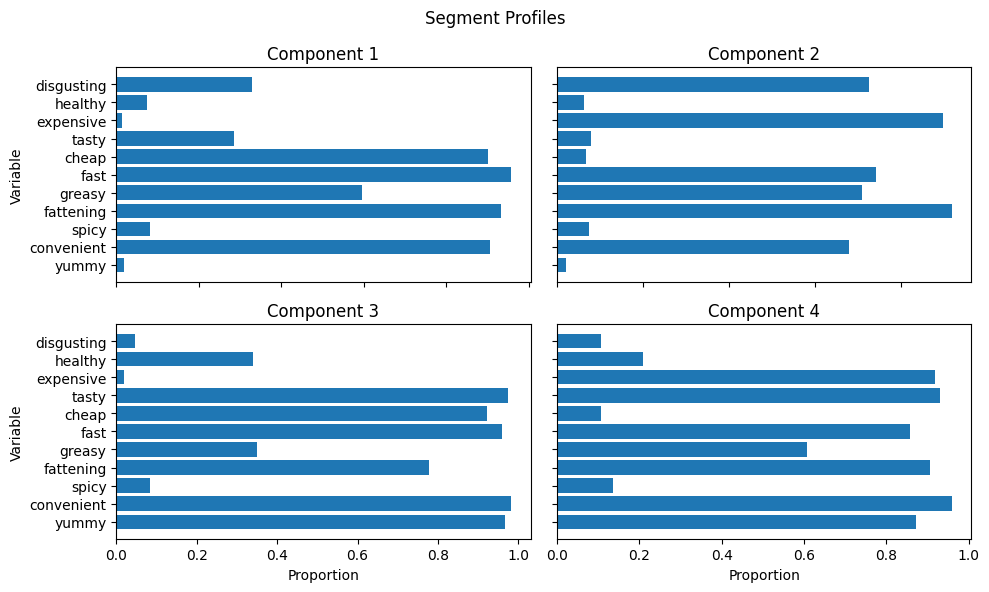

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = MD.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()



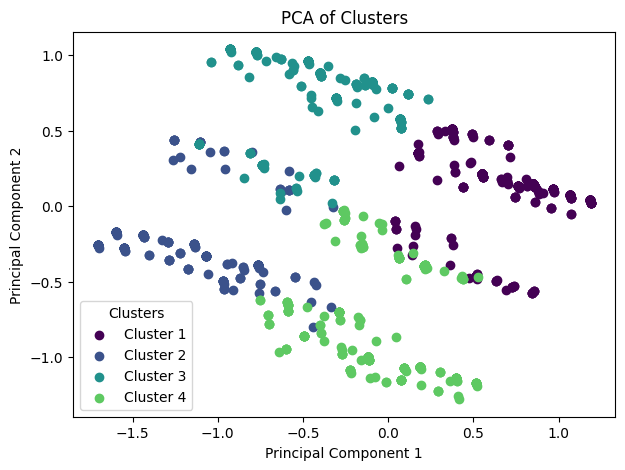

In [59]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD)

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD)

# Get cluster labels
labels = kmeans.labels_

# Create a color map for the clusters using the updated method
unique_labels = set(labels)
colors = plt.colormaps['viridis']  # Use the new colormap approach

# Create the scatter plot
fig, ax = plt.subplots()

for i in unique_labels:
    ax.scatter(MD_pca[labels == i, 0], MD_pca[labels == i, 1],
               color=colors(i / len(unique_labels)), label=f'Cluster {i + 1}')  # Normalize to [0, 1]

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Clusters')
ax.legend(title='Clusters')
plt.show()

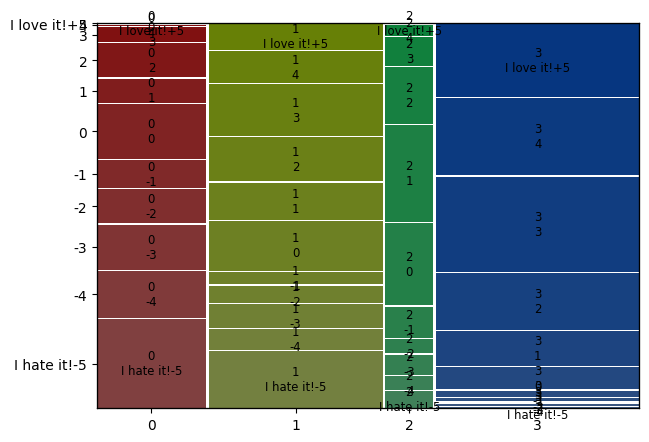

In [27]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    data1[x] = LabelEncoder().fit_transform(data1[x])
    return data1

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
data1
df_eleven = data1.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
data1['cluster_num'] = kmeans.labels_
crosstab =pd.crosstab(data1['cluster_num'],data1['Like'])
#Reordering cols
data1
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','1','2','3','4','I love it!+5']]
crosstab
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

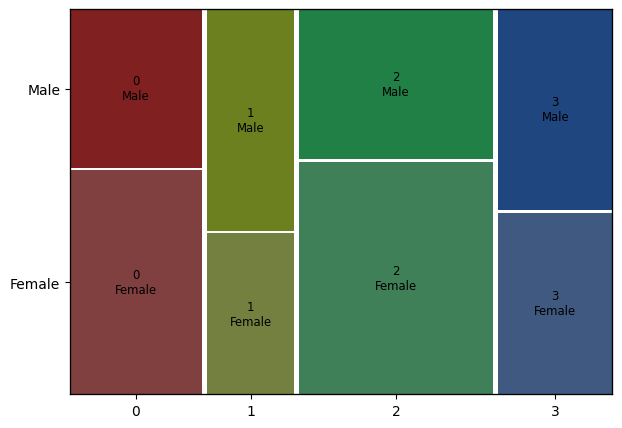

In [28]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, data['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

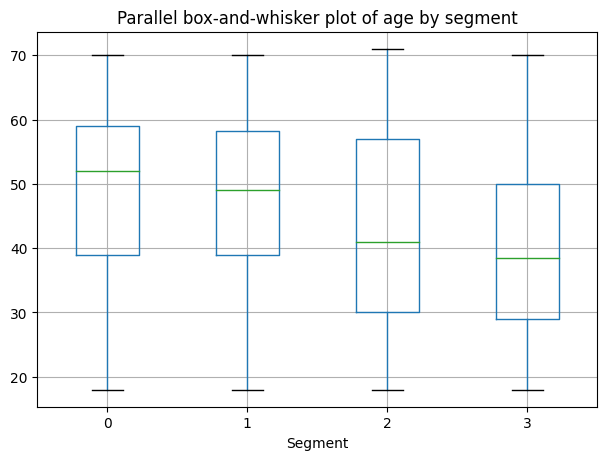

In [29]:
df = pd.DataFrame({'Segment': k4, 'Age': data['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()


-----------------------------------------

In [30]:
data1['VisitFrequency'] = LabelEncoder().fit_transform(data1['VisitFrequency'])
visit = data1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.787162
1,1,2.596195
2,2,2.618321
3,3,2.598553


In [31]:
#Like
data1['Like'] = LabelEncoder().fit_transform(data1['Like'])
Like = data1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,4.641892
1,1,5.839323
2,2,4.549618
3,3,7.097649


In [32]:
data1['Gender'] = LabelEncoder().fit_transform(data1['Gender'])
Gender = data1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


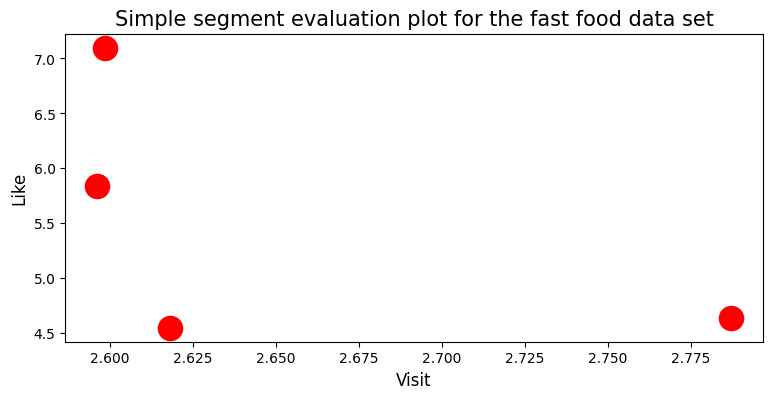

In [33]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()